In [1]:
%load_ext autoreload
%autoreload 2  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style("darkgrid")
pd.set_option('display.max_rows', 100)
pd.set_option("display.max_columns", 100)

# 1. Datos: Precipitaciones, Indicadores Económicos Banco Central  
• Cargar archivo precipitaciones.csv con las precipitaciones medias mensuales registradas entre enero 1979 y abril 2020. (Unidad: mm).  
• Cargar archivo banco_central.csv con variables económicas.

In [4]:
df_prec = pd.read_csv('precipitaciones.csv') #precipitaciones medias (unidad: mm)
df_bcentral = pd.read_csv('banco_central.csv') #variables económicas
df_prec.shape, df_bcentral.shape

((496, 9), (614, 85))

# 2. Análisis de datos. Creación de variables

• Realiza un análisis exploratorio de la base de datos, ¿Qué puedes decir de los datos, sus distribuciones, valores faltantes, otros? ¿Hay algo que te llame la atención?

**Respuesta:**  
Sobre el archivo de precipitaciones, no tiene valores faltantes ni duplicados, en cuanto a las distribuciones son parecidas para todas las ciudades: de noviembre a marzo son meses secos/con poca precipitación y a partir de abril se ve una tendencia al alza con junio-julio-agosto como los meses más húmedos. Adicional a eso, al ver la distribución de precipitaciones histórica por año, vemos que cada vez los máximos anuales son más bajos.

En el archivo del banco central, tenemos pocos repetidos y algunos errores de formato (meses número 13), pero lo que más llama la atención es el número de valores faltantes ya que este es un porcentaje muy alto para algunos campos. Sin embargo, al ordenar las distribuciones por mes y año, vemos que en realidad es más un caso de datos que se empezaron a recolectar en fechas diferentes. Por ejemplo las variables relacionadas al **Imacec** aparecen desde 1996, las del **PIB** y **Ocupación** desde el 2013, y las que tienen más historia son las variables de precios ya que algunas están completas desde 1970. En cuanto a las distribuciones, las únicas que parecen tener una tendencia clara son las variables relacionadas a los precios.

**Análisis exploratorio precipitaciones.csv**

In [5]:
df_prec.sample(5)

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
393,1984-09-01,16.071542,70.507224,105.828020,144.462527,178.782645,200.384841,175.665171,232.428359
261,2009-10-01,0.399288,3.520779,20.891309,39.860387,85.529268,152.249096,239.029931,312.009264
335,2007-05-01,11.719176,14.217419,25.662232,39.321054,34.775591,65.433783,108.857898,134.406059
407,1989-09-01,13.635902,27.463636,56.921476,46.087798,42.469284,45.306935,68.103305,96.444380
61,1989-08-01,69.360987,112.755893,199.110403,263.945876,260.532687,232.132946,240.407342,328.267597


In [6]:
df_prec.info() #no hay valores faltantes, aparentemente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 496 non-null    object 
 1   Coquimbo                             496 non-null    float64
 2   Valparaiso                           496 non-null    float64
 3   Metropolitana_de_Santiago            496 non-null    float64
 4   Libertador_Gral__Bernardo_O_Higgins  496 non-null    float64
 5   Maule                                496 non-null    float64
 6   Biobio                               496 non-null    float64
 7   La_Araucania                         496 non-null    float64
 8   Los_Rios                             496 non-null    float64
dtypes: float64(8), object(1)
memory usage: 35.0+ KB


In [7]:
df_prec.duplicated(subset=['date']).sum() #no hay duplicidad en los periodos

0

In [8]:
#df_prec.describe(percentiles=np.arange(0.1, 1, 0.1))

In [9]:
#dividir el campo date en año y mes
df_prec[['Anio', 'Mes']] = df_prec.date.str.split('-', expand=True)[[0, 1]]
df_prec = df_prec.sort_values(by=['Anio', 'Mes'], axis=0).reset_index(drop=True)

In [10]:
#listas los nombres de columnas que son cuidades
prec_cities=['Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago', 'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio', 'La_Araucania', 'Los_Rios']

In [11]:
#para poder ver las distribuciones mensuales
aux_month = df_prec[prec_cities + ['Mes']].melt('Mes')
aux_month = aux_month.rename({'variable':'ciudad', 'value':'precipitacion'}, axis=1)

<AxesSubplot:xlabel='Mes', ylabel='precipitacion'>

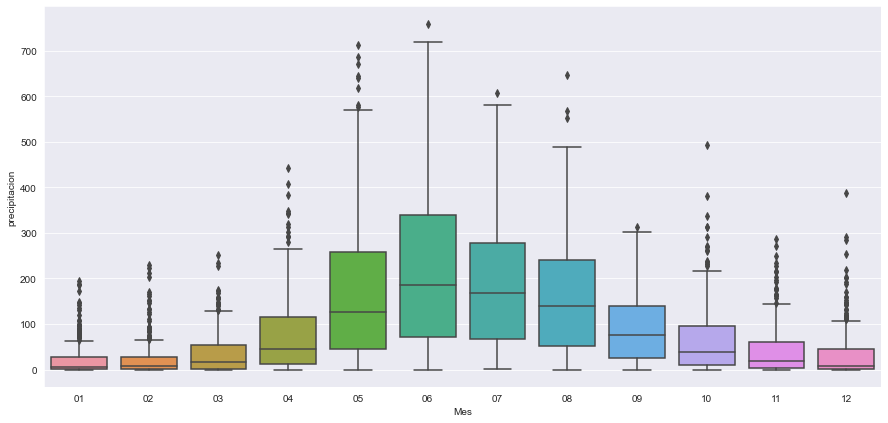

In [12]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=aux_month, x='Mes', y='precipitacion')

Text(0.5, 1.0, 'Distribución de las precipitaciones por mes en cada ciudad')

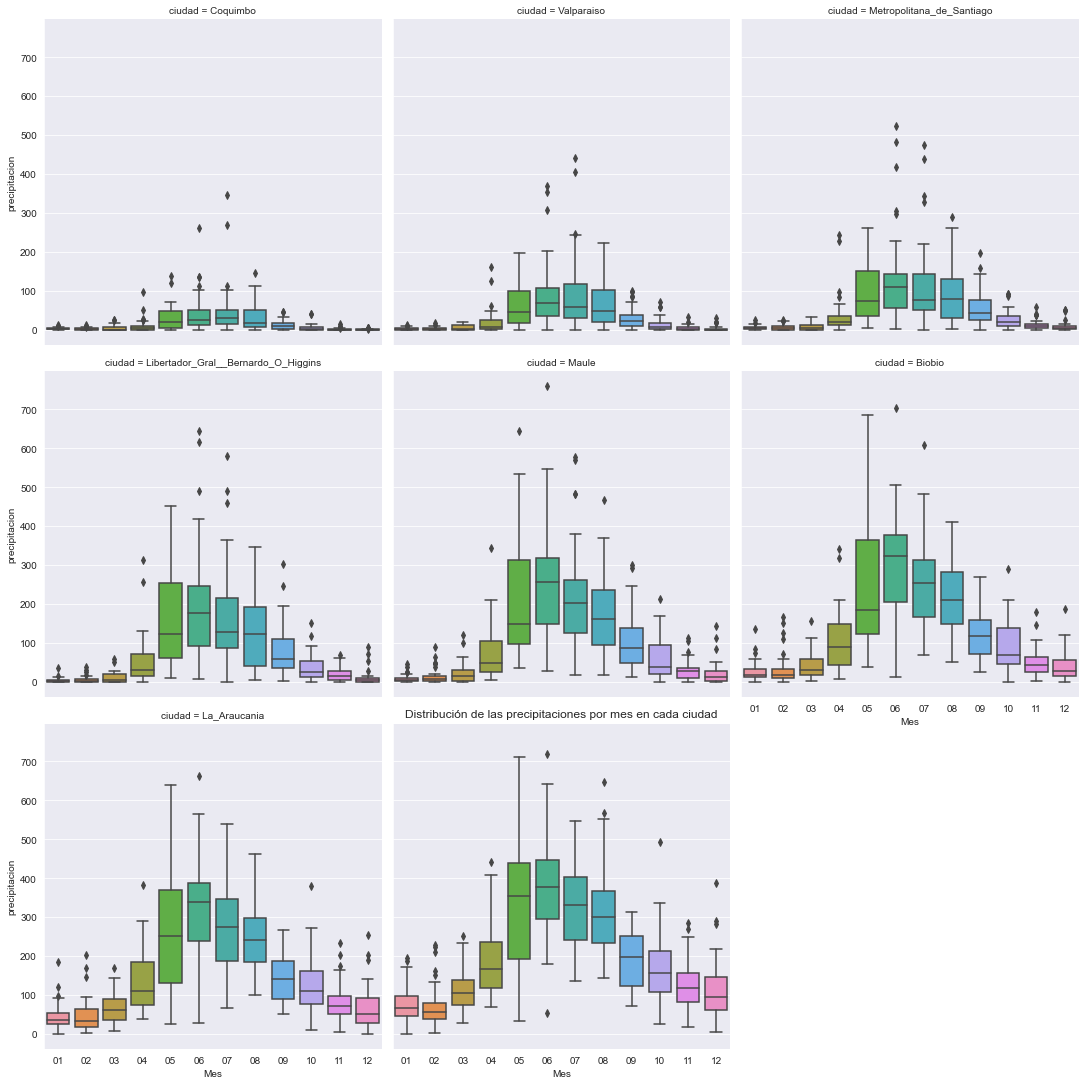

In [13]:
sns.catplot(x="Mes", y="precipitacion", col="ciudad", data=aux_month, kind="box", col_wrap=3)
plt.title('Distribución de las precipitaciones por mes en cada ciudad')

In [14]:
#para poder ver las distribuciones anuales
aux_year = df_prec[prec_cities + ['Anio']].melt('Anio')

<AxesSubplot:xlabel='Anio', ylabel='value'>

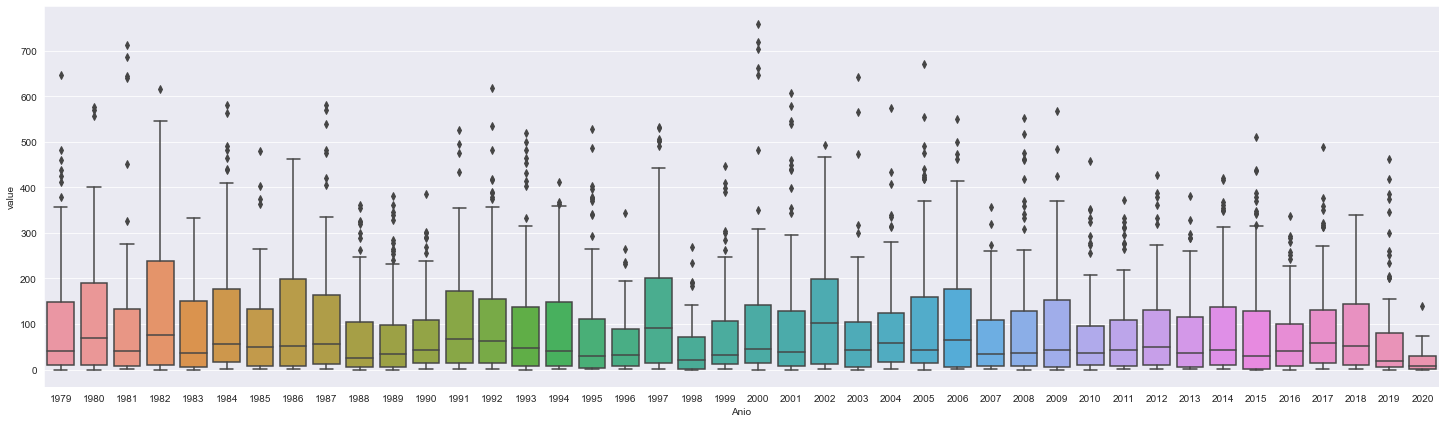

In [15]:
plt.figure(figsize=(25, 7))
sns.boxplot(data=aux_year, x='Anio', y='value')

**Análisis exploratorio banco_central.csv**

In [16]:
df_bcentral.sample(5)

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
182,1973-01-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.71,65.14,2.020,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,1995-01-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.02,378.76,4.780,1.36,NaN,NaN,NaN,NaN,18.00,NaN,405.778.182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.438.571,91.994.588,NaN,406.350.271,NaN,630.109.978,NaN,NaN,NaN,NaN,NaN
84,2020-01-01 00:00:00 UTC,110.288.587,110.053.602,971.096.859,107.389.384,122.090.238,121.522.337,108.043.984,110.123.027,111.698.153,604.131.758,518.877.666,122.550.223,109.011.388,135.734.314,137.151.288,389.203.949,159.274.779,273.945.661,674.065.895,10.284.094,111.967.126,207.493.115,713.216.779,231.161.091,368.888.906,730.780.272,126.745.937,258.025.138,670.299.142

In [17]:
pd.DataFrame(df_bcentral.isnull().sum() / len(df_bcentral))

,0
Periodo,0.000000
Imacec_empalmado,0.511401
Imacec_produccion_de_bienes,0.511401
Imacec_minero,0.511401
Imacec_industria,0.509772
Imacec_resto_de_bienes,0.511401
Imacec_comercio,0.509772
Imacec_servicios,0.511401
Imacec_a_costo_de_factores,0.511401
Imacec_no_minero,0.511401


In [18]:
#dividir el periodo en mes y año para poder operar mejor
df_bcentral[['Anio', 'Mes']] = df_bcentral['Periodo'].str.split('-', expand=True)[[0, 1]]
df_bcentral['periodo'] = df_bcentral['Anio'] + df_bcentral['Mes']
df_bcentral = df_bcentral.sort_values(['Anio', 'Mes']).reset_index(drop=True)

In [19]:
df_bcentral.duplicated(subset=['Mes', 'Anio']).sum() #si hay duplicidad (Se corregirá después)

2

In [20]:
df_bcentral.isnull().groupby(df_bcentral['Anio']).sum().T

Anio,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Periodo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Imacec_empalmado,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Imacec_produccion_de_bienes,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Imacec_minero,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Imacec_industria,12,12,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Imacec_resto_de_bienes,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Imacec_comercio,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Imacec_servicios,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Imacec_a_costo_de_factores,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Imacec_no_minero,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


Variables relacionadas al **Imacec**

In [21]:
imacec_cols = [c for c in df_bcentral.columns if ('Imacec' in c)]

for c in imacec_cols:
    df_bcentral[c] = df_bcentral[c].str.replace('.','').replace('a', np.nan).astype(float)

df_bcentral[imacec_cols] = df_bcentral[imacec_cols].astype(float)

<AxesSubplot:xlabel='periodo', ylabel='Imacec_industria'>

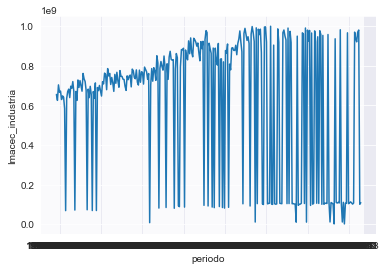

In [22]:
sns.lineplot(data=df_bcentral, x='periodo', y='Imacec_industria')

<AxesSubplot:xlabel='periodo', ylabel='Imacec_comercio'>

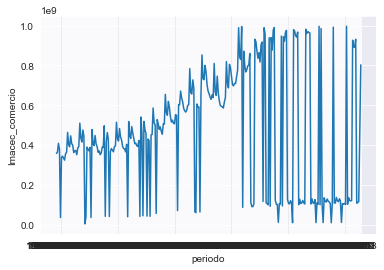

In [23]:
sns.lineplot(data=df_bcentral, x='periodo', y='Imacec_comercio')

In [24]:
# aux_imacec = df_bcentral[['periodo'] + imacec_cols].melt('periodo')
# sns.relplot(x="periodo", y="value", col="variable", data=aux_imacec, kind="line", col_wrap=3)

Variables relacionadas al **PIB**

In [25]:
pib_cols = [c for c in df_bcentral.columns if ('PIB' in c)]

for c in pib_cols:
    df_bcentral[c] = df_bcentral[c].str.replace('.','').replace('a', np.nan)

df_bcentral[pib_cols] = df_bcentral[pib_cols].astype(float)

<AxesSubplot:xlabel='periodo', ylabel='PIB_Alimentos'>

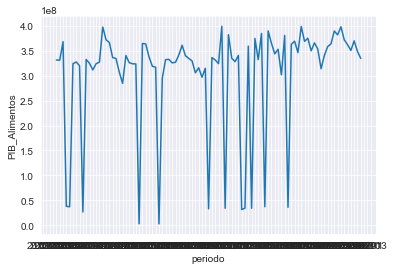

In [26]:
sns.lineplot(data=df_bcentral, x='periodo', y='PIB_Alimentos')

In [27]:
# aux_pib = df_bcentral[['periodo'] + pib_cols].melt('periodo')
# sns.relplot(x="periodo", y="value", col="variable", data=aux_pib, kind="line", col_wrap=3)

Variables relacionadas a **Precios**

In [28]:
prec_cols = [c for c in df_bcentral.columns if ('Precio_' in c)]

for c in prec_cols:
    try:
        df_bcentral[c] = df_bcentral[c].str.replace('.','').replace('a', np.nan).astype(float)
    except:
        continue

df_bcentral[prec_cols] = df_bcentral[prec_cols].astype(float)

In [29]:
# aux_prec = df_bcentral[['periodo'] + prec_cols].melt('periodo')
# sns.relplot(x="periodo", y="value", col="variable", data=aux_prec, kind="line", col_wrap=3)

<AxesSubplot:xlabel='periodo', ylabel='Precio_de_la_onza_troy_de_oro_dolaresoz'>

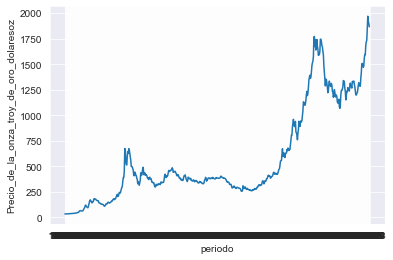

In [30]:
sns.lineplot(data=df_bcentral, x='periodo', y='Precio_de_la_onza_troy_de_oro_dolaresoz')

• Realiza una limpieza de datos para que las series de tiempo no tengan duplicados ni valores incorrectos.

**Respuesta:** 
En el caso del archivo de precipitaciones, no es necesario realizar mayor limpieza ya que no hay valores nulos ni duplicados.

En el archivo del banco central, se remplaza el mes 13 por el mes 12 y se eliminan los duplicados. En cuanto a los nulos, considero que lo mejor es evaluar que campos utilizaremos y a partir de que año para poder remplazarlos. Ya que en los casos donde por ejemplo se tiene registros data a partir del 2013, no sería viable pensar remplazar todos los registros desde 1970 al 2013.

In [31]:
for c in list(df_bcentral.columns):
    if(c in ['Anio', 'Mes']): continue
        
    try:
        df_bcentral[c] = df_bcentral[c].str.replace('.','').replace('a', np.nan).astype(float)
    except:
        continue

In [32]:
df_bcentral['Mes'] = df_bcentral['Mes'].replace('13', '12')
df_bcentral = df_bcentral.drop_duplicates(subset=['Anio', 'Mes'])

# 3. Visualización

- Crea una función que permita graficar series históricas de precipitaciones para un rango de fechas determinado. Para esto la función debe recibir como argumentos el nombre de una región, fecha de inicio y fecha de término (asegúrate de verificar en tu función que tanto el nombre de la región como las fechas ingresadas existan en el dataset).

In [33]:
def plot_rango_precipitaciones(df, region, fecha_inicio, fecha_fin):
    #Verificaciones
    assert region in df.columns, "Enter a valid region" #verificar que existe la región
    assert fecha_inicio in df['date'].unique(), "Ingrese una fecha de inicio válida"
    assert fecha_fin in df['date'].unique(), "Ingrese una fecha de fin válida"
    assert fecha_inicio < fecha_fin, "Ingrese una fecha de inicio menor que la fecha de fin"
    
    #Procesamiento
    aux = df[(df['date'] >= fecha_inicio) & (df['date'] <= fecha_fin)][['date', region]] #filtro de rango de fehcas y campos necesarios
    aux = aux.reset_index(drop=True) #reinicio de indices
    
    #Visualización
    ticks = aux[aux['date'].str.contains('01-01')]['date'] #etiquetas del eje x
    p = aux.plot(kind='line', x='date', title=f'Precipitaciones desde {fecha_inicio} hasta {fecha_fin}, de la region de {region}',
             legend=False, figsize=(20, 7))
    p.set_xticks(ticks.index)
    p.set_xticklabels(ticks.values)
    plt.xticks(rotation=90)
    plt.ylabel('Precipitaciones en mm')
    plt.xlabel('Fecha')

- Usa esta función para graficar las precipitaciones para la Región Libertador General Bernardo O'Higgins y para la Región Metropolitana entre las fechas 2000-01-01 y 2020-01-01. ¿ Qué observas con respecto a estacionalidades y tendencias?

**Respuesta:** No hay una tendencia creciente o decreciente muy marcada, pero si se puede ver que los puntos máximos en la medida de precipitación de cada año, están disminuyendo.

Dentro de un mismo año, si hay estacionalidad. Al inicio de este los niveles de precipitación son bajos, luego incrementan hasta llegar a su pico a mediados de año, y luego vuelven a descender. Adicional a eso, las distribuciones son bastantes parecidas, lo cual nos indica que incluso cuando una región es más húmeda que otra, la estacionalidad se mantiene.

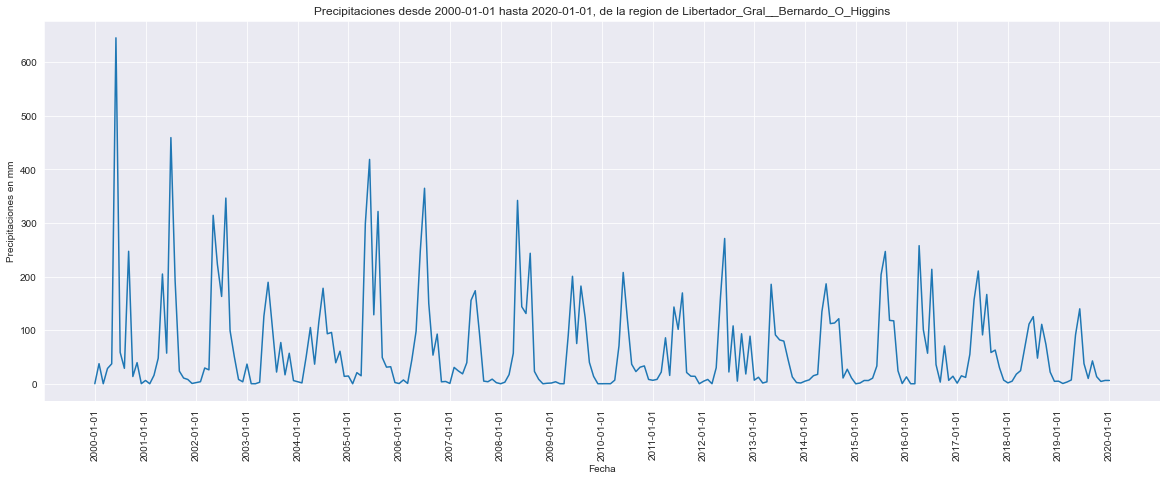

In [34]:
plot_rango_precipitaciones(df_prec, 'Libertador_Gral__Bernardo_O_Higgins', '2000-01-01', '2020-01-01')

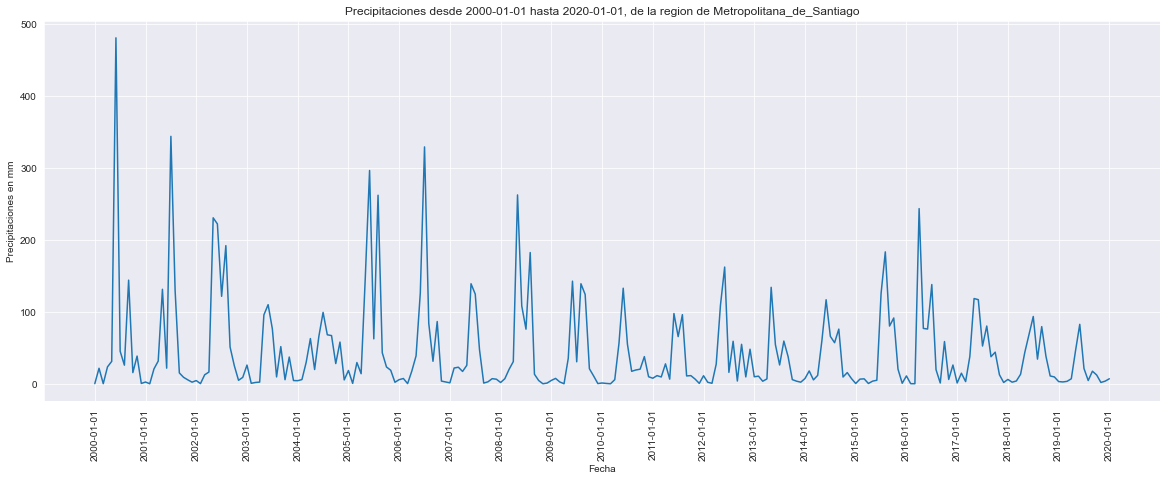

In [35]:
plot_rango_precipitaciones(df_prec, 'Metropolitana_de_Santiago', '2000-01-01', '2020-01-01')

- Crea una función que, para una región, grafique múltiples series de tiempo mensuales de precipitaciones, donde cada serie de tiempo corresponda a un año. La función debe recibir como argumento una lista con los años que queremos graficar (2000, 2005,..) y el nombre de la región. El eje X debe indicar los meses (enero, febrero, etc...).

In [36]:
def plot_series_mensuales(df, region, anios):
    #Obtener los años precentes en el dataset
    df[['year', 'month']] = df['date'].str.split('-', expand=True)[[0, 1]]
    df[['year', 'month']] = df[['year', 'month']].astype(int)
    anios_tot = df['year'].unique()
    
    #Verificaciones
    for a in anios:
        #verificar que los años solicitados existan dentro del dataset
        assert a in anios_tot, f"El año ingresado {a} es inválido"
        
    #Procesamiento
    aux = df[df['year'].isin(anios)][['year', 'month', region]]
    meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    
    #Visualización
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=aux, x='month', y=region, hue='year')
    plt.xticks(sorted(aux['month'].unique()), labels=meses, rotation=90)
    plt.ylabel('Precipitaciones en mm')
    plt.xlabel('Mes')
    plt.title(f'Precipitaciones mensuales para multiples años de la región de {region}')

• Usa esta función para graficar las precipitaciones para la Región del Maule durante los años 1982, 1992, 2002, 2012 y 2019. ¿Qué puedes concluir de estos gráficos?

**Respuesta:** En esta gráfica podemos ver con mayor claridad la tendencia que mencionamos en el ejercicio anterior: Los meses de Nov-Mar (casi Abril) tienden a ser secos, mientras que de Mayo-Agosto hay más cantidad de precipitaciones y se dan los picos anuales.

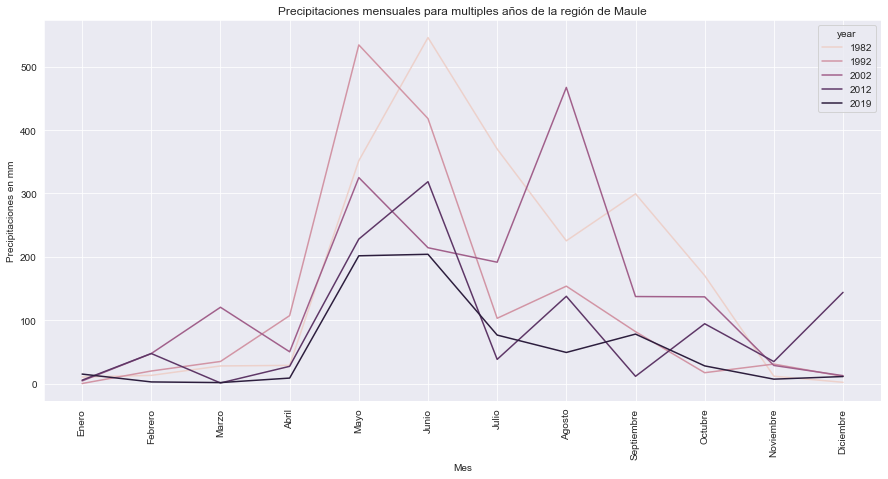

In [37]:
plot_series_mensuales(df_prec, 'Maule', [1982, 1992, 2002, 2012, 2019])

- Crea una función que permita visualizar dos series históricas de PIB para un rango de fechas determinado. Para esto la función debe recibir como input el nombre de cada serie, fecha de inicio y fecha de término.

In [38]:
def plot_serie_pib(df, nombre_pib1, nombre_pib2, fecha_inicio, fecha_fin='0000-00-00'):
    #Transformar el campo de periodo
    df['periodo_cast'] = df['Periodo'].str.split(expand=True)[0]
    #verificar si se ha ingresado el parámetro fecha fin
    if (fecha_fin == '0000-00-00'): fecha_fin = df['periodo_cast'].max()
    
    #Verificaciones
    assert (nombre_pib1 in df.columns), "El nombre {nombre_pib1} no exite, inserte un nombre de serie válido"
    assert (nombre_pib2 in df.columns), "El nombre {nombre_pib2} no exite, inserte un nombre de serie válido"
    assert fecha_inicio in df['periodo_cast'].unique(), "Ingrese una fecha de inicio válida"
    assert fecha_fin in df['periodo_cast'].unique(), "Ingrese una fecha de fin válida"
    assert fecha_inicio < fecha_fin, "Ingrese una fecha de inicio menor que la fecha de fin"
    
    #Procesamiento
    aux = df[(df['periodo_cast'] >= fecha_inicio) & (df['periodo_cast'] <= fecha_fin)] #extraer solo el rango requerido
    aux = aux[['periodo_cast', nombre_pib1, nombre_pib2]] #seleccionar solo los campos que necesitamos para graficar
    aux = aux.reset_index(drop=True) #reiniciar los indices
    aux[[nombre_pib1, nombre_pib2]] = aux[[nombre_pib1, nombre_pib2]]//(10**6) #trasnformar las unidades del PIB a millones
    
    #Visualización
    ticks = aux[aux['periodo_cast'].str.contains('01-01')]['periodo_cast']
    p = aux.plot(kind='line', x='periodo_cast', title=f'{nombre_pib1} y {nombre_pib2} desde {fecha_inicio} hasta {fecha_fin}',
             legend=True, figsize=(20, 7))
    plt.xticks(rotation=90)
    p.set_xticks(ticks.index)
    p.set_xticklabels(ticks.values)
    plt.ylabel('PIB en Millones')
    plt.xlabel('Periodo')

- Grafica las series de tiempo del PIB agropecuario y silvícola y la del PIB de Servicios financieros desde el 2013-01-01 hasta la fecha más reciente en que haya datos.
o ¿Qué puedes decir de cada serie en particular? o ¿Hay alguna relación entre estas dos series?

**Respuesta:** Sobre el **PIB_Agropecuario_silvicola** este tiene un pico anual (bastante marcado) que se da durante los meses de menos precipitaciones, por otro lado, en los meses donde hay una mayor presencia de precipitaciones, el PIB tiende a bajar. No se ve una tendencia al alza o la baja a lo largo de los años.

El **PIB_Servicios_financieros** si tiene una tendencia ascendente desde el 2013. Además, es menos estacional ya que tiene periodos de alza más largos y consistentes.


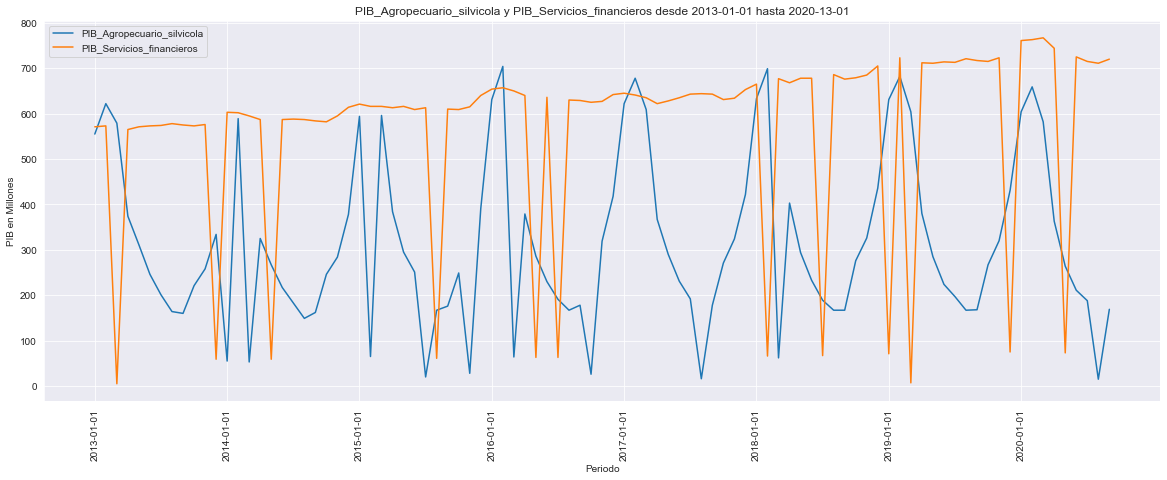

In [39]:
plot_serie_pib(df_bcentral, 'PIB_Agropecuario_silvicola', 'PIB_Servicios_financieros', '2013-01-01')

# 4. Tratamiento y creación de variables

- ¿Cómo podríamos evaluar la correlación entre las distintas series de tiempo y cómo se tienen que correlacionar para entrenar un modelo? ¿Mucha correlación, no correlacionadas, da igual?

**Respuesta:** Una de las medidas de correlación más utilizadas es Pearson correlation, y esta nos indica si dos series de tiempo varían juntas (correlación 1) , varían de forma opuesta (mientras una aumenta la otra disminuye, correlación -1) o no están correlacionadas para nada (correlación 0). Para poder entrenar un modelo, las series de tiempo deben estar algo correlacionadas con la serie de “target” de forma positiva o negativa (cercano a 1 o -1).

- Para el entrenamiento del modelo, queremos predecir el precio de la leche para el productor en Chile. Para eso, descarga el archivo precio_leche.csv y haz un merge con las bases de datos de precipitaciones y datos del Banco Central.

In [40]:
df_leche = pd.read_csv('precio_leche.csv')
df_leche.shape

(506, 3)

In [41]:
#Convertir los meses a formato numérico 
meses = {'Ene': '01', 'Feb': '02', 'Mar': '03', 'Abr': '04', 'May': '05', 'Jun': '06', 'Jul': '07', 'Ago': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dic': '12'}
df_leche['Mes_nombre'] = df_leche['Mes']
df_leche['Mes'] = df_leche['Mes'].replace(meses)
df_leche['Anio'] = df_leche['Anio'].astype(str)

In [42]:
#obtener las columnas a mezclar con el dataset de leche
bc_cols = list(df_bcentral.columns)
for item in ['Periodo', 'periodo', 'periodo_cast']: bc_cols.remove(item)

In [43]:
#merge
df_final = pd.merge(df_leche, df_prec[['Anio', 'Mes'] + prec_cities], how="right", on=['Anio', 'Mes'])
df_final = pd.merge(df_final, df_bcentral[bc_cols], how="right", on=['Anio', 'Mes'])
df_final = df_final[df_final['Precio_leche'].notna()]
df_final = df_final.sort_values(['Anio', 'Mes']).reset_index(drop=True)
df_final.shape

(496, 96)

• Crea las variables: A partir de la variable fecha, crea nuevas variables para el año, mes, trimestre. o Lags y estadísticas acumuladas (por ejemplo: promedio, varianza) de las variables que consideres relevantes.

In [44]:
#data de periodos y de trimestre
df_final['Periodo'] = df_final['Anio'] + df_final['Mes']
trimestres = {'01':'1', '02':'1', '03':'1', '04':'2', '05':'2', '06':'2', '07':'3', '08':'3', '09':'3', '10':'4', '11':'4', '12':'4'}
df_final['Trimestre'] = df_final['Mes'].replace(trimestres)

In [45]:
df_final = df_final[df_final['Anio']>='2014']

<AxesSubplot:xlabel='Anio'>

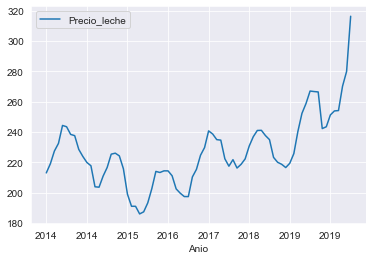

In [46]:
df_final.plot(kind='line', x='Anio', y='Precio_leche')

In [47]:
df_final.corr()[['Precio_leche']].sort_values(by=['Precio_leche'], ascending=False).style.background_gradient(cmap='coolwarm')

,Precio_leche
Precio_leche,1.000000
Precio_de_la_onza_troy_de_oro_dolaresoz,0.785411
Los_Rios,0.275023
PIB_Alimentos,0.261213
PIB_Comunicaciones,0.239602
Ocupacion_en_Explotacion_de_minas_y_canteras_INE,0.239191
La_Araucania,0.236797
Biobio,0.228307
Ocupacion_en_Administracion_publica_y_defensa_INE,0.222207
Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,0.221134


Viendo las correlaciones y la distribución del target, nos damos cuenta que el precio de la leche tiene tendencia ascendente y una estacionalidad no tan marcada. Dicho esto, se entiende que variables sin tendencia y con estacionalidad tengan poca correlación (como el la mayoría de variables dentro del PIB y las precipitaciones). También se ve que las más correlacionadas son las variables referentes a precios, que en la parte de exploración de datos, vimos que también tienen tendencia ascendente. Por esta razón eliminaremos las variables que tengan entre [-0.1 – 0.1] de correlación.

In [48]:
df_final = df_final.drop('No_sabe__No_responde_Miles_de_personas', axis=1)
corr = df_final.corr()[['Precio_leche']]
uncorr_cols = list(corr[(corr['Precio_leche'] > -0.1) & (corr['Precio_leche'] < 0.1)].index)
df_final = df_final.drop(uncorr_cols, axis=1)

Para las variables con más de 0.2 o menos de -0.2, crearemos variables adicionales de media y desviación estandar de los ultimos 3 y 6 meses.

In [49]:
corr_cols = list(corr[(corr['Precio_leche'] < -0.2) | (corr['Precio_leche'] > 0.2)].index)
corr_cols.remove('Precio_leche')

In [50]:
for c in corr_cols:
    df_final[f'{c}_mean_3m'] = df_final[c].rolling(window=3).mean().fillna(0)
    df_final[f'{c}_std_3m'] = df_final[c].rolling(window=3).std().fillna(0)
    df_final[f'{c}_mean_6m'] = df_final[c].rolling(window=6).mean().fillna(0)
    df_final[f'{c}_std_6m'] = df_final[c].rolling(window=6).std().fillna(0)

In [51]:
# df_final.corr()[['Precio_leche']].sort_values(by=['Precio_leche'], ascending=False).style.background_gradient(cmap='coolwarm')

# 5. Modelo

- Entrena un modelo que permita predecir el precio de la leche el próximo mes, en función de los datos entregados. Si necesitas crear variables adicionales que pueden aportar información al modelo, tienes total libertad.

In [52]:
df_final['Target_precio_leche'] = df_final['Precio_leche'].shift(periods=1)
df_final = df_final[df_final['Target_precio_leche'].notna()]
df_final = df_final.reset_index(drop=True)

In [53]:
df_final = df_final.drop(['Mes_nombre'], axis=1)
train = df_final[df_final['Anio'] < '2019']
test = df_final[df_final['Anio'] >= '2019']

In [54]:
X_train, y_train = train.drop(['Target_precio_leche'], axis=1), train['Target_precio_leche']
X_test, y_test = test.drop(['Target_precio_leche'], axis=1), test['Target_precio_leche']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59, 119), (59,), (16, 119), (16,))

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rf = RandomForestRegressor(random_state = 42, criterion='mse')
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

- Construye una base de test (o de cross validation). ¿Cuál fue tu definición de tiempo/cantidad de datos para este set de datos? Explica por qué la elegiste así.

**Respuesta:** Elegí datos a partir del 2014 para entrenar porque es el primer años donde se tienen todas las variables completas. Los datos de entrenamiento fueron del 2014 al 2018, y la evalución del 2019 y 2020. Hice la división de esa forma porque los dos últimos años representan el 30% aprox del dataset. Es importante. Resaltar que en el caso de series de tiempo la elección del test no puede ser aleatoria, ya que es importante que sea con periodos posteriores al entrenamiento.

In [57]:
from sklearn.metrics import mean_squared_error
import math

In [58]:
math.sqrt(mean_squared_error(y_test, rf.predict(X_test)))

26.44231972202643

 - ¿Qué datos adicionales te gustaría tener? ¿Qué datos son necesarios para que este modelo funcione/mejore las métricas?
 
 **Respuesta:** Creo que sería importante tener datos sobre la producción de leche y sus derivados del mes anterior, además de datos como la inflación mensual/anual. También, vemos que tiene alta correlación con datos como el precio del oro y la minería, así que datos sobre los precios de más metales podrían ayudar.

Finalmente, también considero que para que el modelo funcione mejor se deberían hacer experimentos talvez con menos variables pero con mas data histórica (probar a partir del año 2000 por ejemplo, en esta ocasión no llegué a realizarlo por factores detiempo).

- ¿Cómo evalúas el resultado del modelo?¿Qué métricas tiene sentido mirar?

**Respuesta:** Al ser un problema de regresión, he decidido evaluar el modelo utilizando la raíz del error cuadrático medio (RMSE). Para esto el error se mide comprando las predicciones y los valores reales sobre el conjunto de test. Con el modelo desarrollado hemos obtenido 26.44 de RMSE, lo cual nos dice que la raíz cuadrada de la media de las diferencias elevadas al cuadrado entre los valores predecidos y reales es 26.44 pesos chilenos.

- ¿Para qué aplicaciones puede servir un modelo de este tipo? En particular, ¿Cómo podría ayudar a combatir el cambio climático?

**Respuesta:** Una de las aplicaciones de este tipo de modelos podría ser dentro de un software de finanzas personales, y donde se le dice a los usuarios “cuanto gastarán en leche (o en otro producto x) de aquí a un año o dos”, a fin de que puedan hacer mejores proyecciones sobre su futuro financiero. En el caso del cambio climático, lo veo un poco más complicado, pero creo que se encontrar correlación entre las variables climatológicas y los precios, se podría mostrar el impacto del cambio climático en las finanzas/gastos de la personas y de esa forma sería más fácil crear conciencia sobre el cuidado el planeta.